In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchaudio

import sys
sys.path.append("./src")
from utils import wav2mel, draw_mel0

In [3]:
track_path = "data/rtMRI/F_18_Sacramento_sub047/tracks/usc_vtsf_F_18_Sacramento_rt_grandfather_r1s1_track.npy"
wav_path = "data/rtMRI/F_18_Sacramento_sub047/wav/usc_vtsf_F_18_Sacramento_rt_grandfather_r1s1.wav"

In [4]:
import IPython.display as ipd
ipd.Audio(wav_path) # load a local WAV file

In [6]:
ema_data = torch.FloatTensor(np.load(track_path))  #[T, 340]
ema_data = ema_data.transpose(-1, -2) #[340, T]
T_ema = ema_data.shape[1]
ema_data_delta = ema_data[:,1:] - ema_data[:,:T_ema-1] #[340, T-1]
ema_data_delta_energy = (ema_data_delta ** 2).sum(dim=0) #[T-1]

"you wish to know all about my grandfather 
well he is nearly ninety three years old and yet  \
he still thinks as swiftly as ever \
he dresses himself in an old br black frock coat usually several buttons missing \
a long beard clings to his chin giving those who observe him a pronounced feeling of utmost respect \
when he speaks his voice is just a bit cracked and quivers a bit"

In [7]:
wav, _ = torchaudio.load(wav_path)

In [8]:
mel = wav2mel(wav)

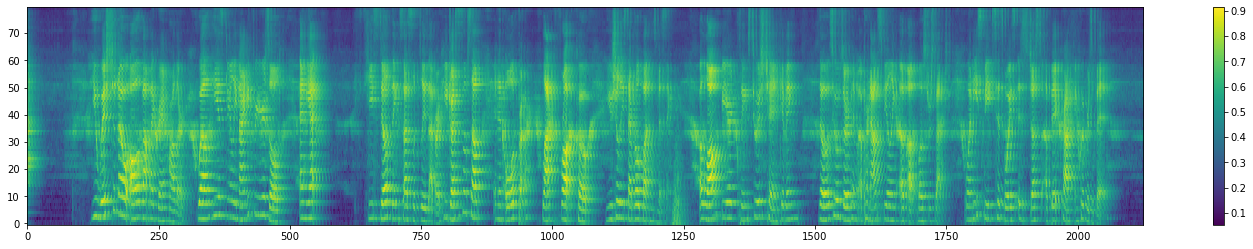

In [15]:
fig, ax = plt.subplots(figsize=(25, 4))
im = ax.imshow(mel.transpose(-1,-2), aspect="auto", origin="lower",
               interpolation='none')
plt.colorbar(im, ax=ax)
fig.canvas.draw()

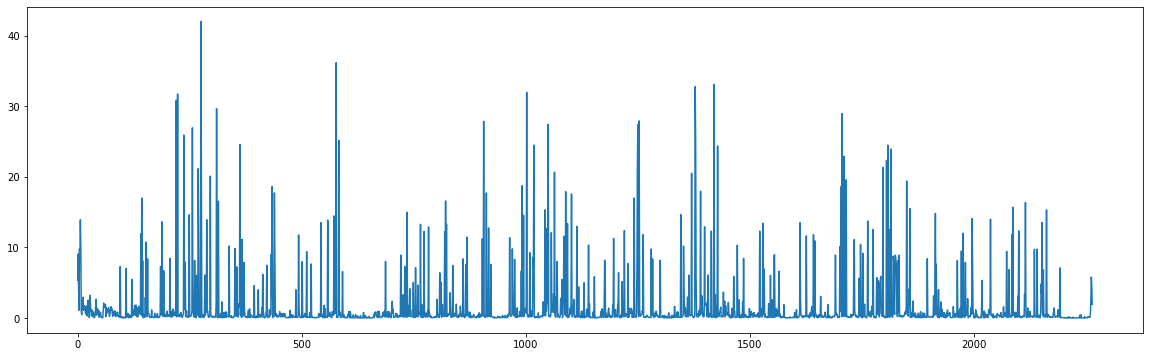

In [18]:
x_test = np.arange(T_ema-1)
plt.figure(figsize=(20, 6))
#plt.plot(x_test[:T_ema//3], ema_data_delta_energy[:T_ema//3])
plt.plot(x_test[:T_ema], ema_data_delta_energy[:T_ema])
plt.savefig("rr.png")